# 유방암 진단 데이터

유방암 진단 사진으로부터 측정한 종양의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지 판별

## 1. 데이터 수집 및 탐색, 전처리

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### 분석 목적
30개의 설명변수를 사용해서 양성 혹은 악성으로 분류하는 문제!

### 분류 모델 후보
[1] 로지스틱 회귀
[2] 서포트벡터머신 
[3] 의사결정나무
[4] 랜덤포레스트

In [21]:
# 데이터셋과 타겟셋을 각각 pandas의 DataFrame으로 변환
import pandas as pd

X = cancer.data
y = cancer.target

cancer_data_df = pd.DataFrame(X, columns=cancer.feature_names)
cancer_target_df = pd.DataFrame(y, columns=["diagnosis"])

In [22]:
# radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension
# 위의 10가지 지표에 mean(평균), se(기준 오류), worst(가장 나쁜 측정치)를 각각 측정
# 즉, 10가지 지표 x 3가지 측정 기준 = 30개 설명변수
cancer_data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
# 0: malignant(악성), 1: benign(양성)
cancer_target_df

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [31]:
# 데이터셋 데이터프레임 + 타겟셋 데이터프레임
cancer_df = pd.concat([cancer_data_df, cancer_target_df], axis=1)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 데이터 구조 확인
결측치, 중복값, 타입, 스케일링, 상관관계(다중공선성 화인)

In [50]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [51]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [52]:
cancer_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

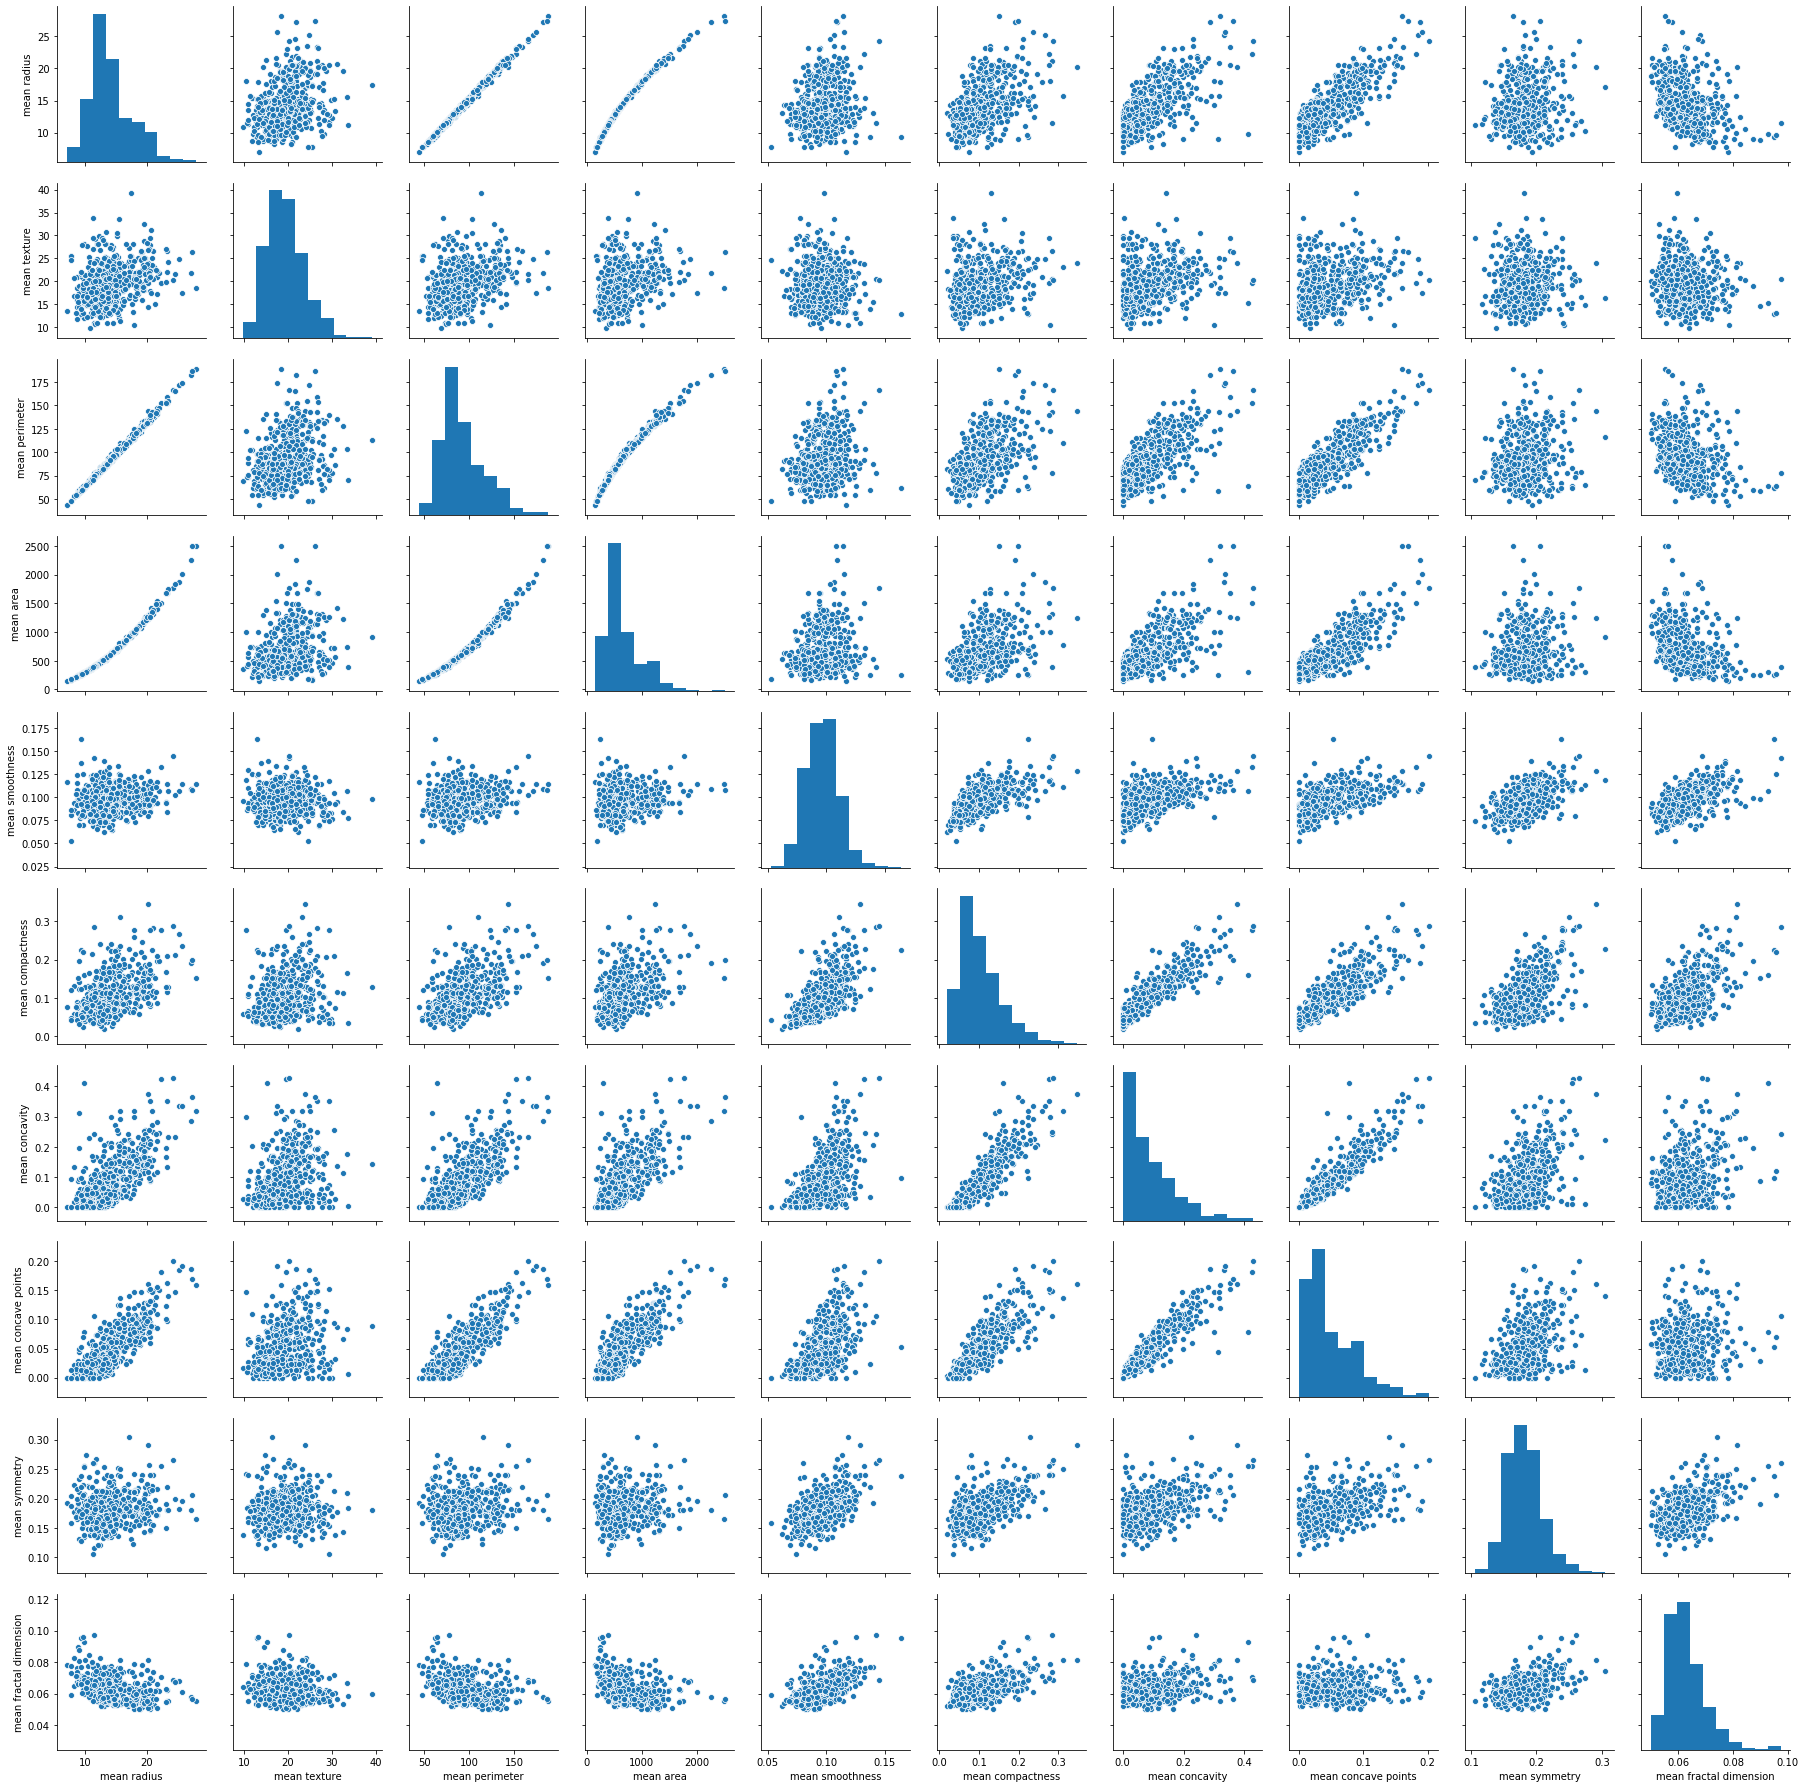

In [58]:
column_names = cancer_df.columns
cols1 = column_names[:10]
cols2 = column_names[10:20]
cols3 = column_names[20:]

sns.pairplot(cancer_df[cols1])
plt.show()

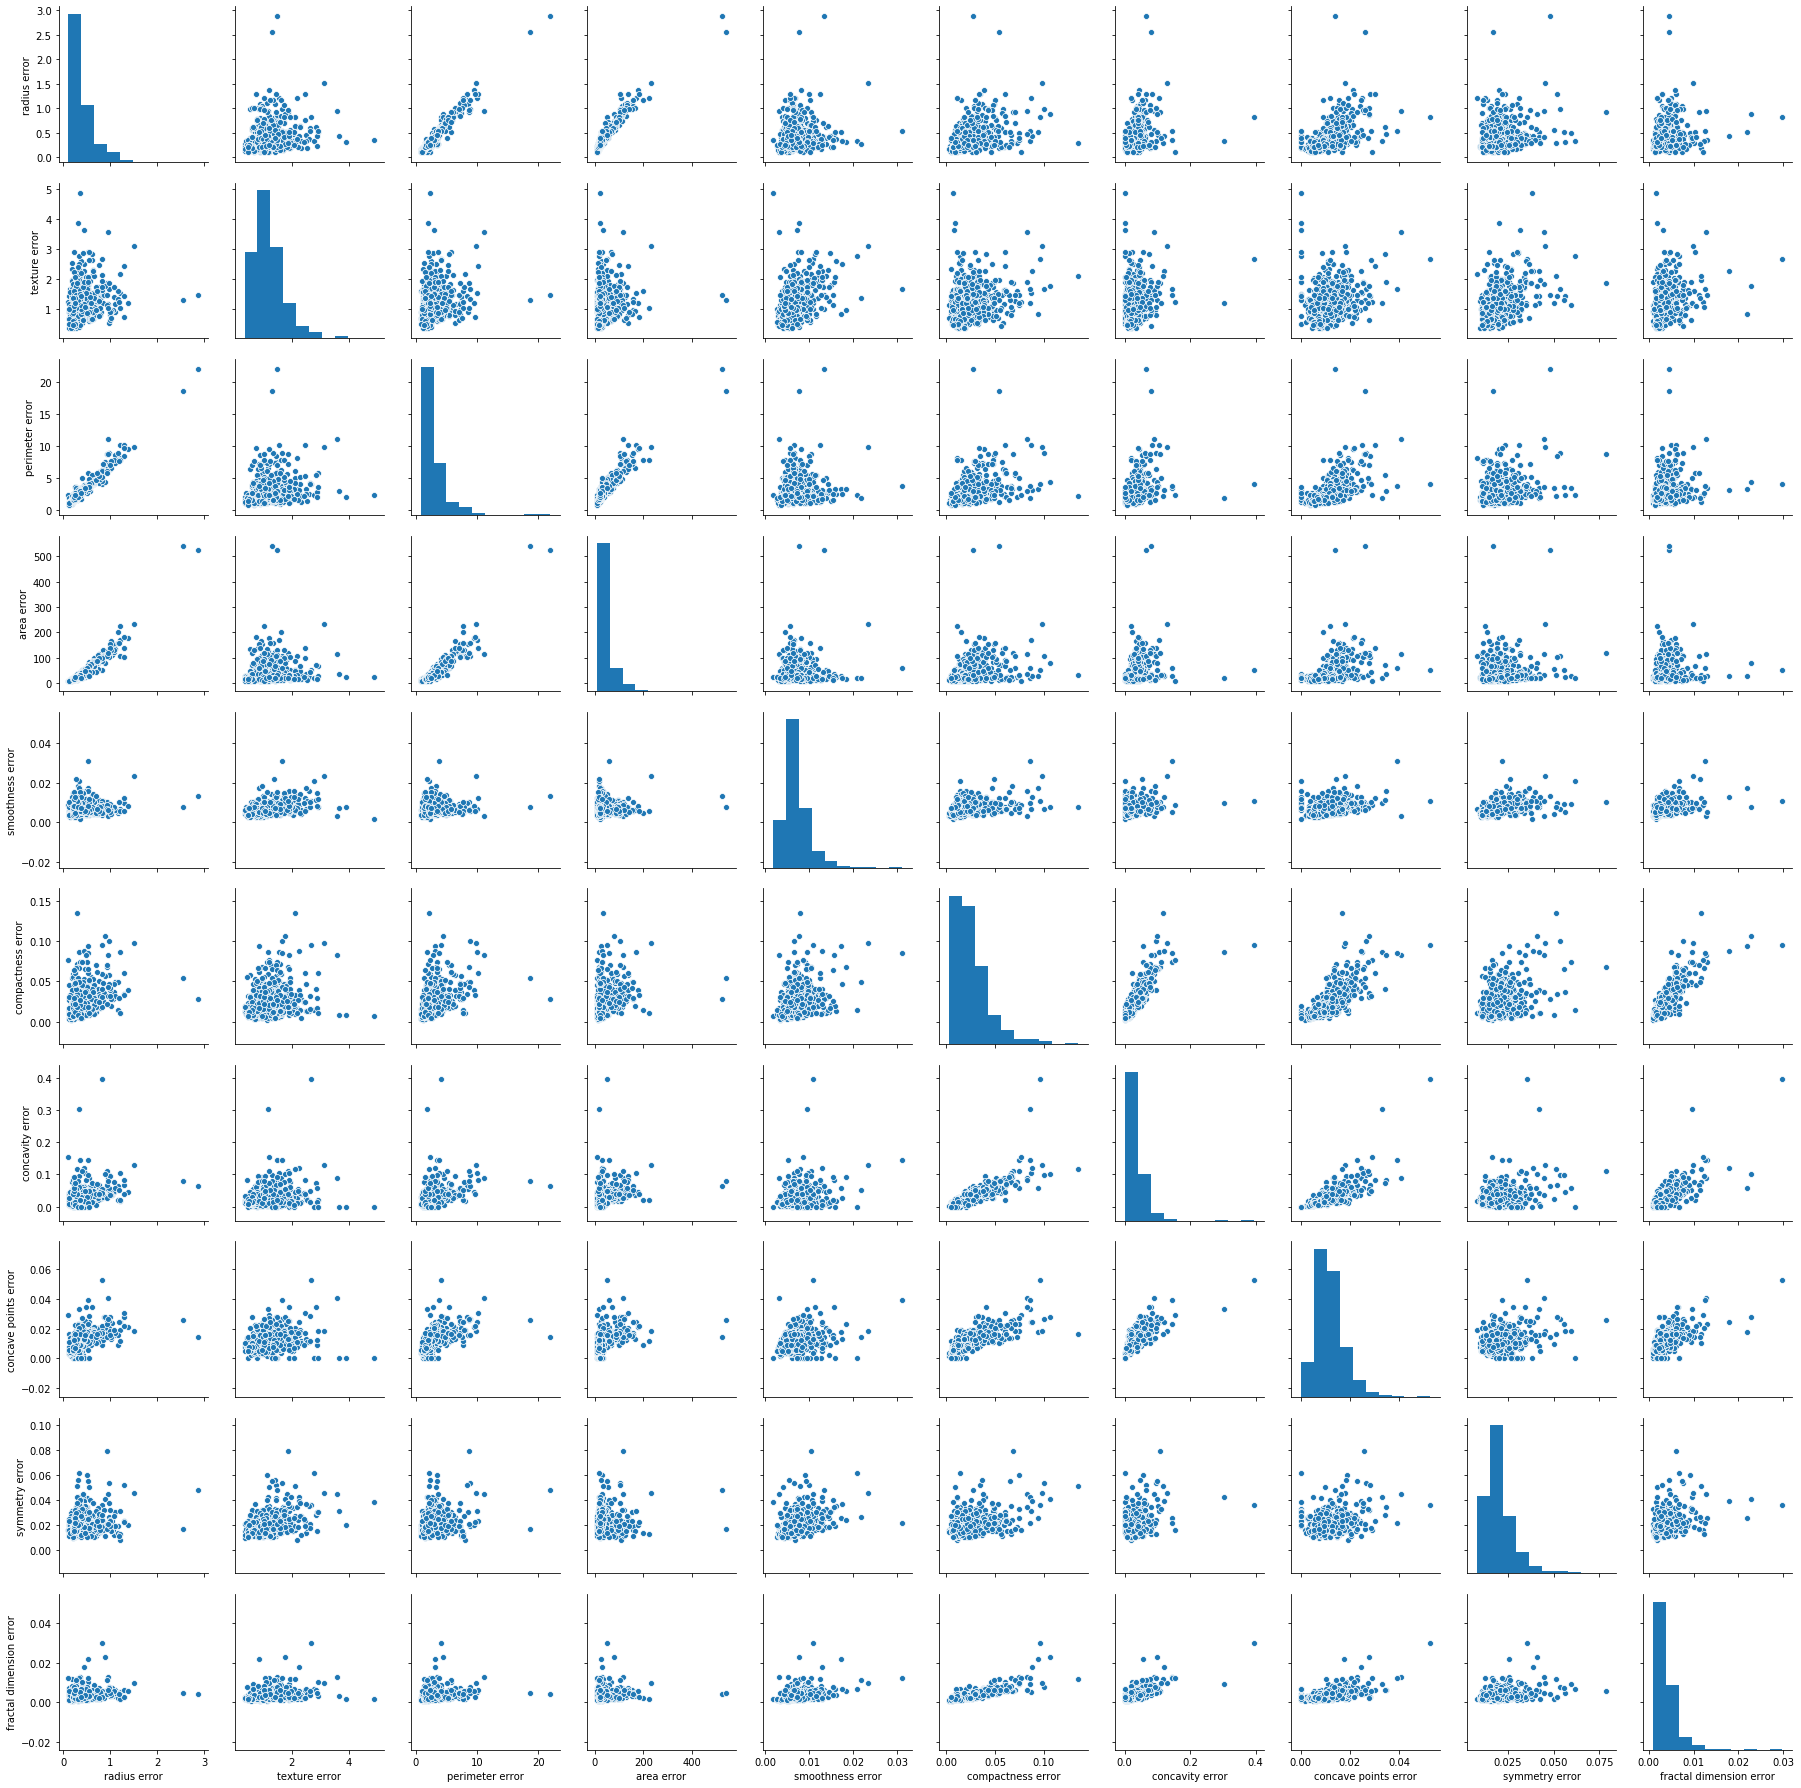

In [59]:
sns.pairplot(cancer_df[cols2])
plt.show()

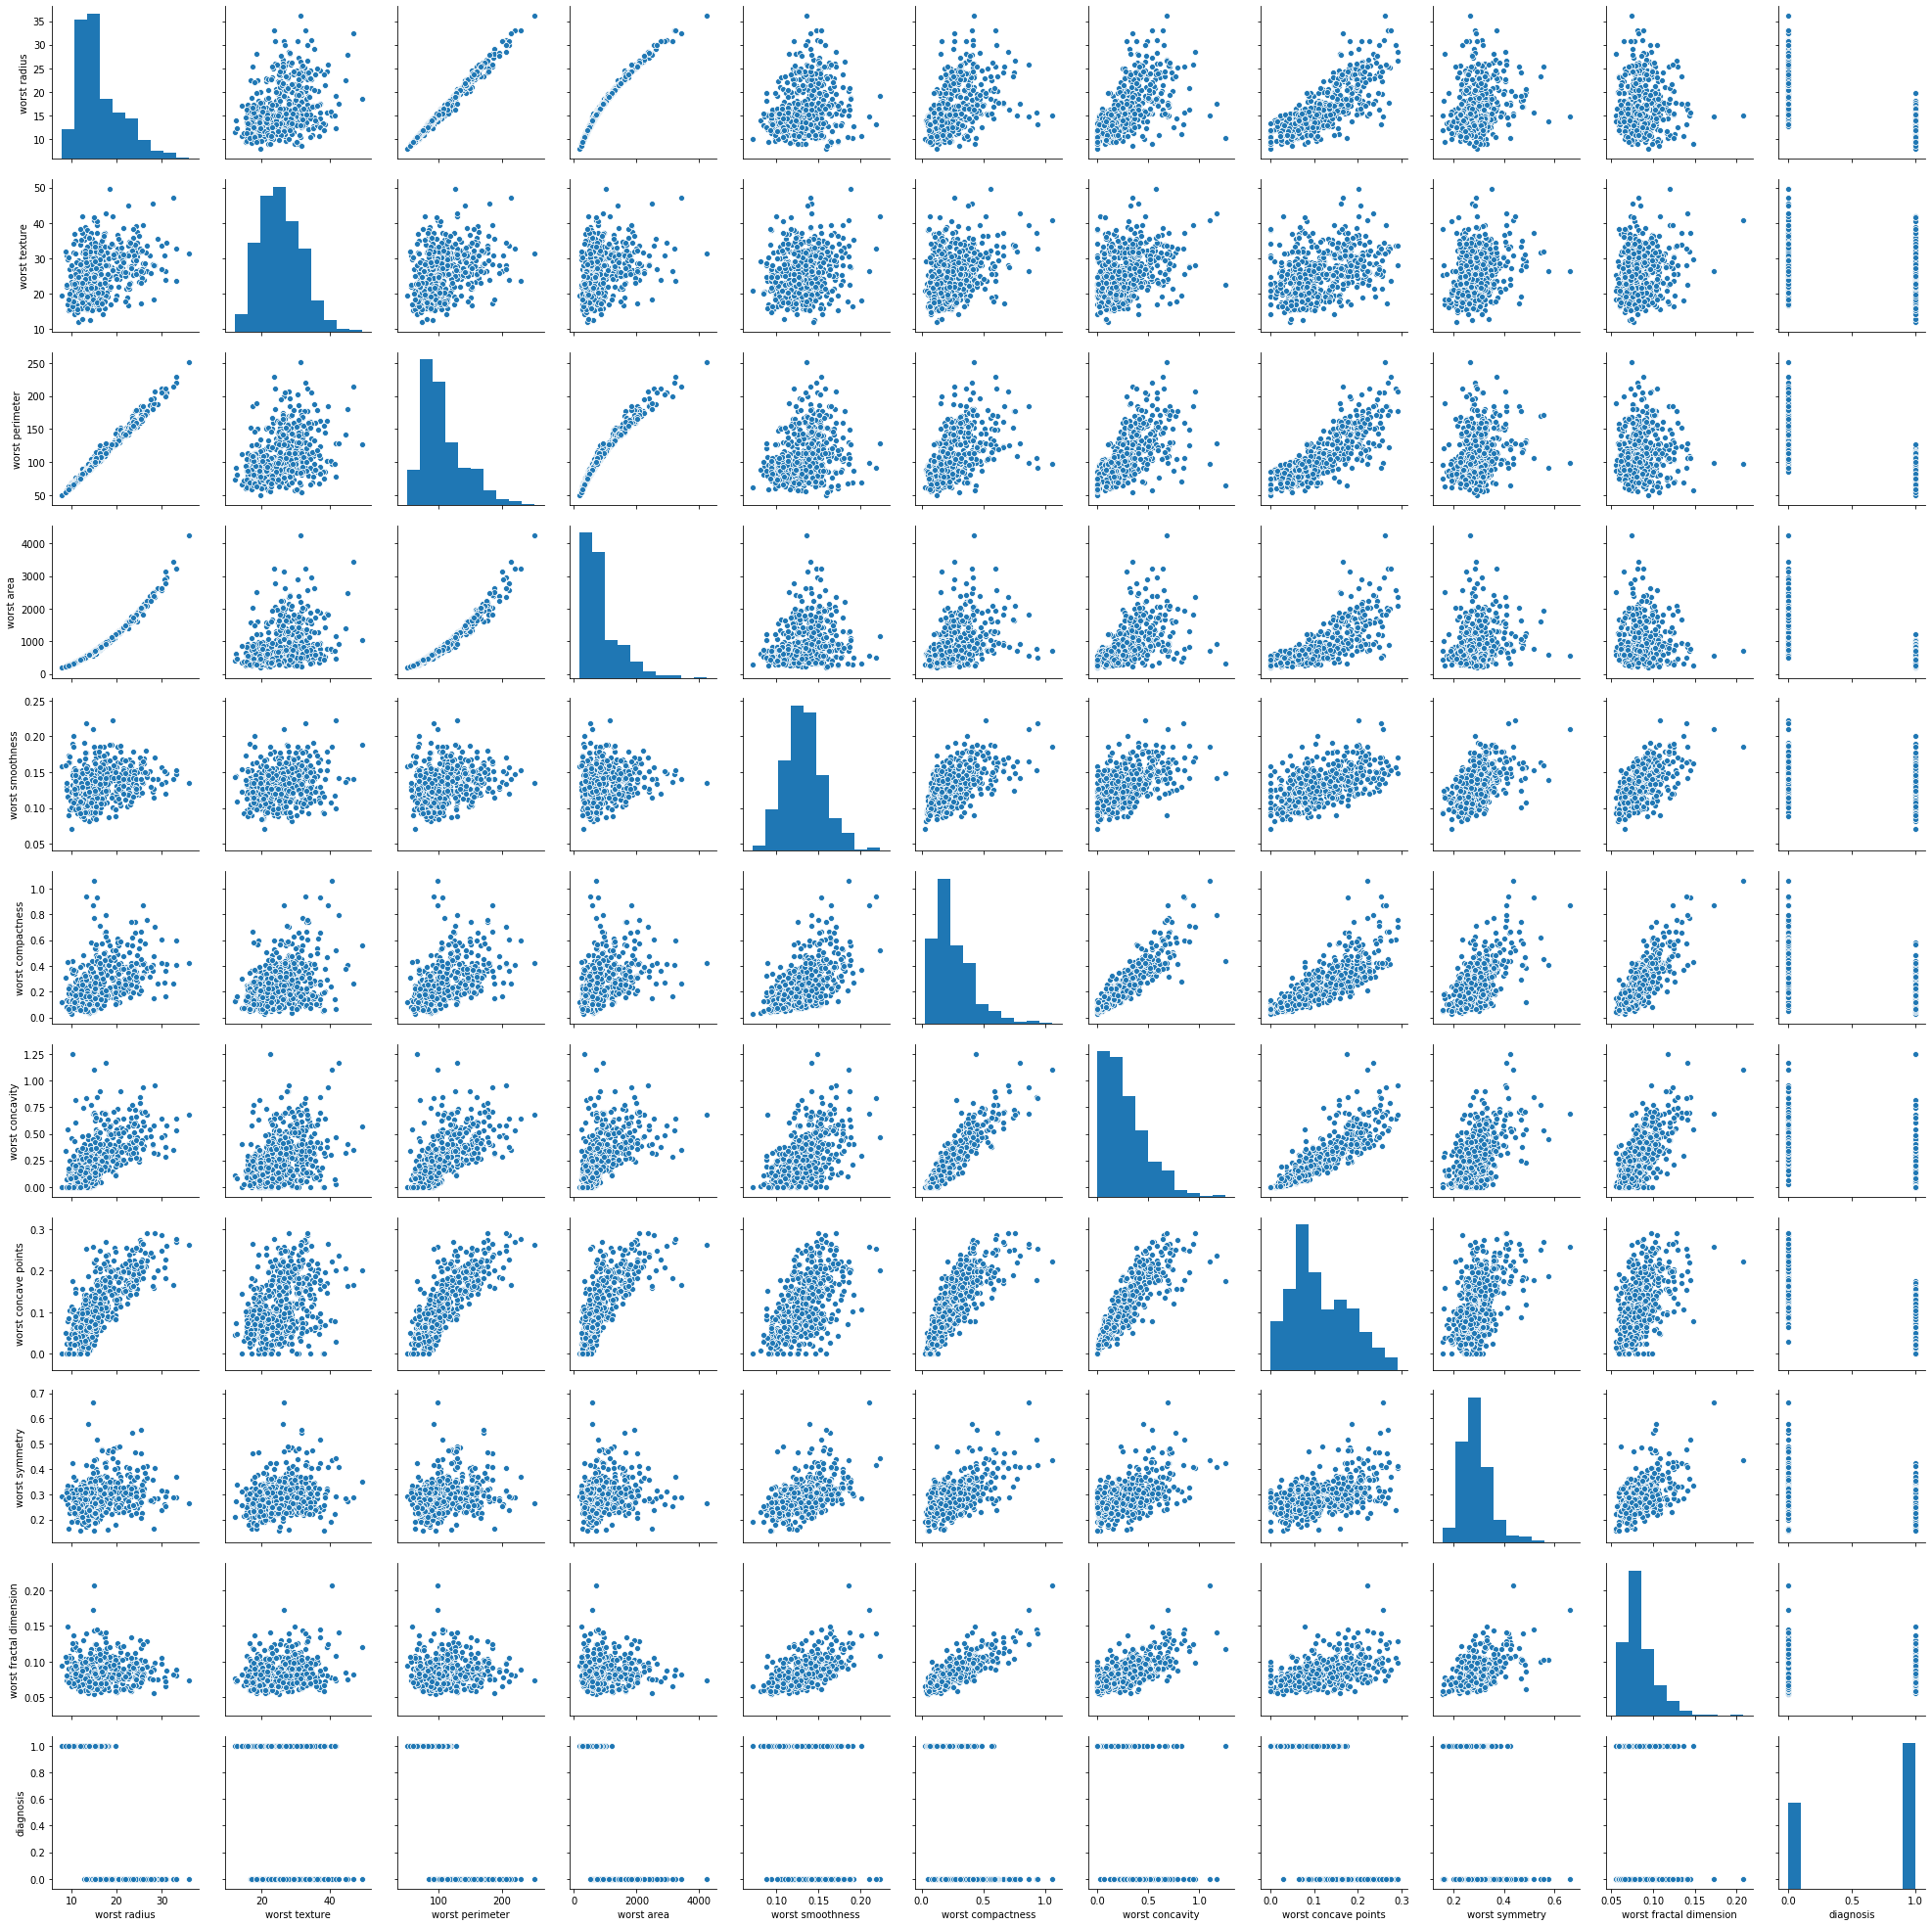

In [60]:
sns.pairplot(cancer_df[cols3])
plt.show()

1) 결측치 없음!  
2) 데이터 타입 전부 수치형!  
3) 스케일링 작업 필요!  
4) 독립변수간의 상관관계가 있어보임 -> 다중공선성 의심

In [62]:
# 상관계수 행렬
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


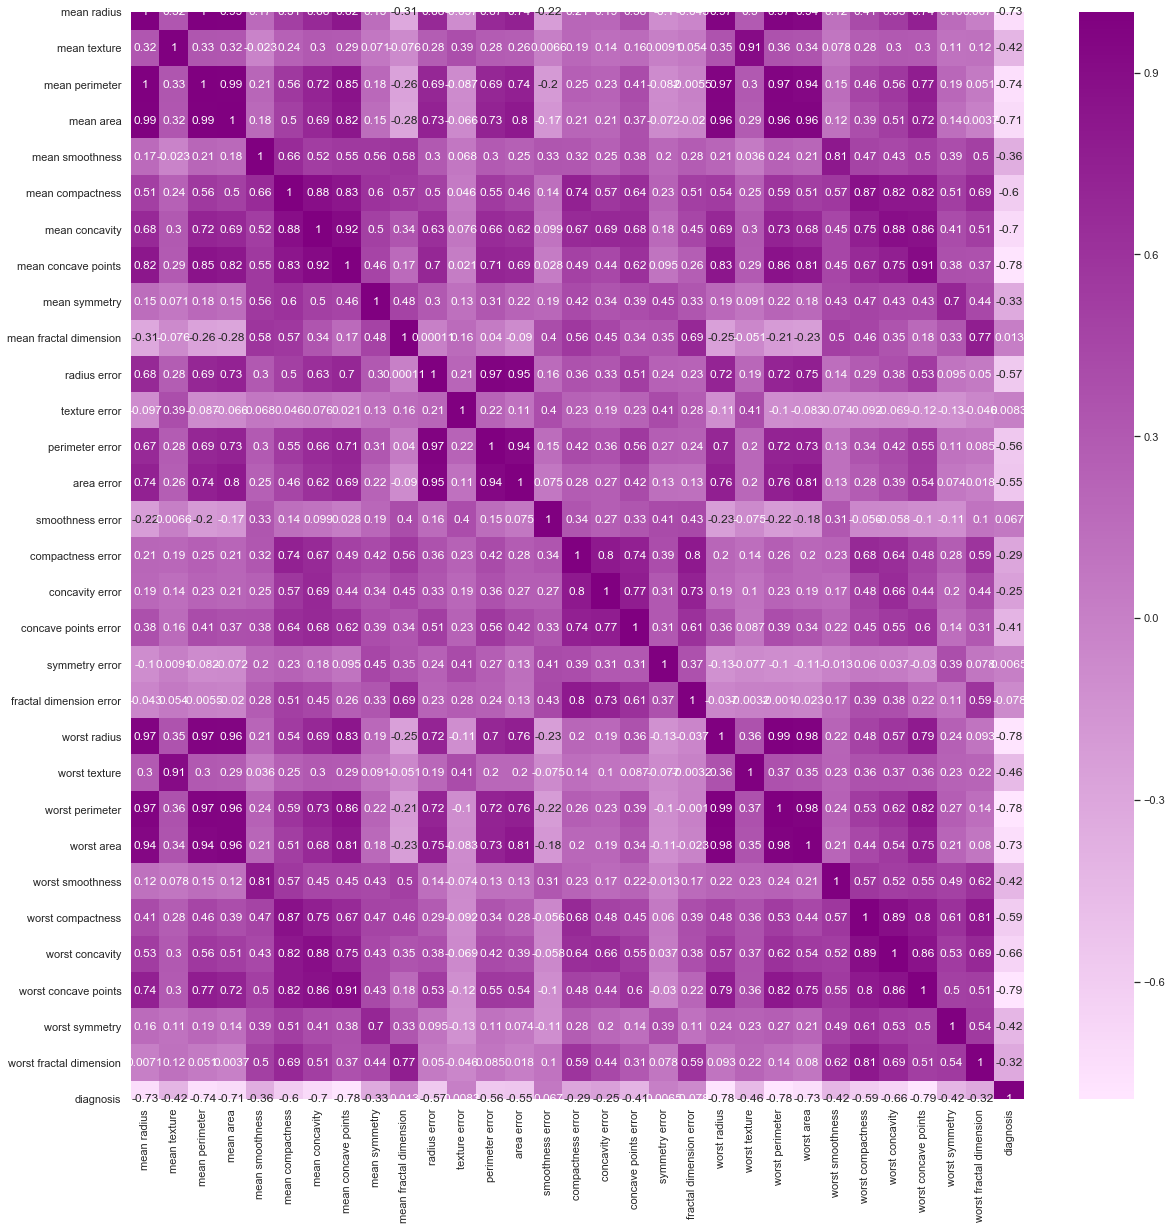

In [74]:
# 히트맵으로 확인
plt.figure(figsize=(20, 20))
cmap = sns.light_palette("purple", as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(cancer_df.corr(), annot=True, cmap=cmap)
plt.show()

In [108]:
# 다중공선성이 있으면 공분산 행렬의 조건수가 증가
import statsmodels.api as sm

results = sm.OLS(y, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              177.6
Date:                Wed, 15 Jan 2020   Prob (F-statistic):                   1.78e-257
Time:                        12:57:12   Log-Likelihood:                          4.4418
No. Observations:                 569   AIC:                                      51.12
Df Residuals:                     539   BIC:                                      181.4
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [167]:
# 분산팽창지수(VIF: Variance Inflation Factor)를 구했을 때 가장 큰 VIF값이 5 이상이면 다중공선성이 있음
# 10 이상이면 다중공선성이 매우 심각
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = cancer_df.columns
vif["VIF Factor"] = [variance_inflation_factor(cancer_df.values, i) for i in range(cancer_df.shape[1])]
vif

,features,VIF Factor
0,mean radius,63955.019898
1,mean texture,251.093672
2,mean perimeter,58213.349861
3,mean area,1320.282793
4,mean smoothness,393.418392
5,mean compactness,200.983909
6,mean concavity,158.033586
7,mean concave points,155.053368
8,mean symmetry,184.712502
9,mean fractal dimension,683.379907


### 스케일링 및 다중공선성 해결
[1] 스케일링  
    - 표준화(StandardScaler)  
    - 정규화(MinMaxScaler)  

[2] 다중공선성  
    - 상관계수 가장 높은 변수 제거(특성 선택)  
    - 차원 축소(PCA, MDS, t-SNE)  
    - 모수 추정 시 Ridge, Lasso, PLS 사용(모델 규제)

In [114]:
# 스케일링(표준화)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
# 차원 축소 사용(PCA)
from sklearn.decomposition import PCA

pca = PCA()
X_pca_reduced = pca.fit_transform(X_scaled)
X_pca_reduced.shape

(569, 30)

In [116]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [117]:
# 95%의 분산을 보존하면서 원하는 PCs(주성분) 구하기
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [151]:
import numpy as np

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수: ', d)

선택할 차원 수:  10


위에서 누적된 pca 분산을 확인해보면, 앞에서부터 10번 째가 0.95로,  
이는 10개의 주성분을 사용하면 원래의 데이터셋의 분산에서 5%를 잃게(95%를 유지하는) 된다는 뜻이다.

In [152]:
# 위에서 구한 식을 통해 10개의 주성분을 추출할 수 있다
pca_data = X_pca_reduced[:, :10]
pca_data.shape

(569, 10)

In [153]:
pca_data[:5, :]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
         1.41142445,  2.15936987, -0.39840723, -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
         0.02865635,  0.01335809,  0.24098846, -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208267, -0.1770859 ,
         0.54145215, -0.66816648,  0.09737374,  0.02406564,  0.4542754 ],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254703, -2.9608784 ,
         3.05342182,  1.4299107 ,  1.05956524, -1.40543967, -1.11697527],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063935,  0.5467474 ,
        -1.22649464, -0.93621255,  0.63637606, -0.26380546,  0.37770447]])

In [154]:
# 차원 축소를 한 새로운 데이터프레임 생성
pca_df = pd.DataFrame(pca_data, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
                                         'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

In [155]:
pca_df['target'] = cancer_target_df

In [156]:
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,0


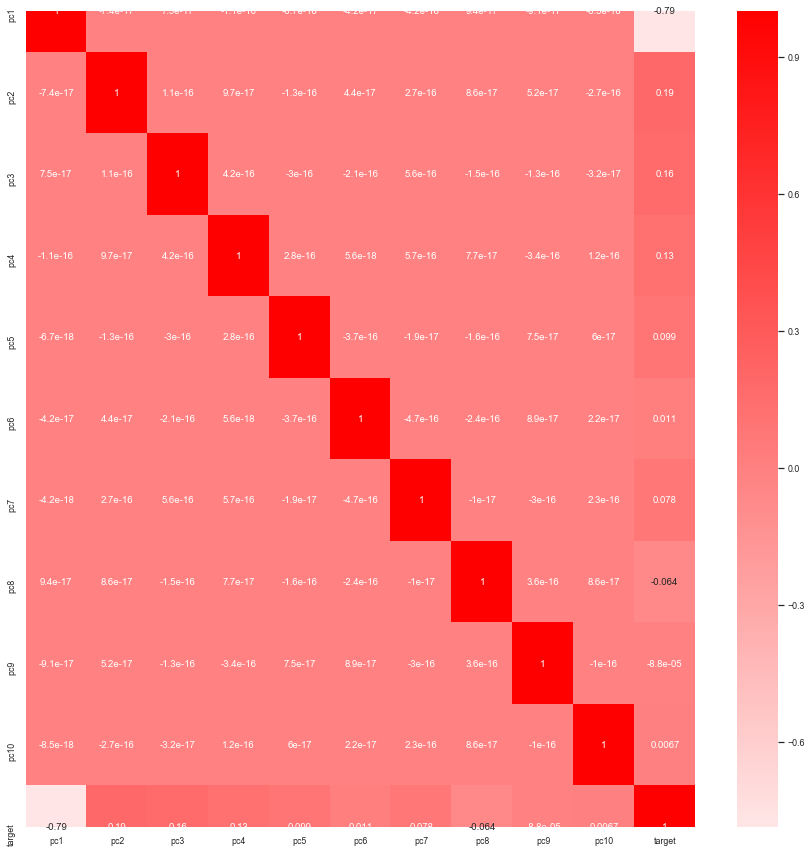

In [157]:
# 다시 한 번 히트맵으로 상관관계 확인
plt.figure(figsize=(15, 15))
cmap = sns.light_palette("red", as_cmap=True)
sns.set(font_scale=0.8)
sns.heatmap(pca_df.corr(), annot=True, cmap=cmap)
plt.show()

In [158]:
X = pca_df.loc[:, 'pc1':'pc10']
y = pca_df.loc[:, 'target']

In [166]:
# 다시 한 번 OLS 분석
pca_results = sm.OLS(y, X).fit()
print(pca_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.267
Model:                            OLS   Adj. R-squared (uncentered):              0.254
Method:                 Least Squares   F-statistic:                              20.34
Date:                Wed, 15 Jan 2020   Prob (F-statistic):                    2.95e-32
Time:                        14:01:03   Log-Likelihood:                         -586.46
No. Observations:                 569   AIC:                                      1193.
Df Residuals:                     559   BIC:                                      1236.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2. 데이터 분리

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [161]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (455, 10)
X_test shape: (114, 10)
y_train shape: (455,)
y_test shape: (114,)


## 3. 모델 선택과 훈련

### 로지스틱 회귀, 서포트벡터머신, 의사결정나무, 랜덤포레스트

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 선택
lin_reg = LogisticRegression()
svm = SVC()
decs_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()

In [220]:
# 위의 분류 모델들의 분류 성능 평가 확인하기(샘플 데이터로)
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             roc_curve)

def sample_performance_score(model, X, y):

    model.fit(X, y)

    # 몇 개의 샘플로 성능 측정
    y_true = y_test[:150]
    y_pred = model.predict(X_test[:150])

    print("Confusion matrix: \n{}".format(confusion_matrix(y_true, y_pred)))
    print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision score: {}".format(precision_score(y_true, y_pred)))
    print("Recall score: {}".format(recall_score(y_true, y_pred)))
    print("F1 score: {}".format(f1_score(y_true, y_pred)))
    print("\n")

# 로지스틱 회귀
print("[로지스틱 회귀]")
sample_performance_score(lin_reg, X_train, y_train)

# SVM
print("[SVM]")
sample_performance_score(svm, X_train, y_train)

# 의사결정트리
print("[의사결정트리]")
sample_performance_score(decs_clf, X_train, y_train)

# 랜덤포레스트
print("[랜덤포레스트]")
sample_performance_score(rnd_clf, X_train, y_train)

[로지스틱 회귀]
Confusion matrix: 
[[39  3]
 [ 0 72]]
Accuracy score: 0.9736842105263158
Precision score: 0.96
Recall score: 1.0
F1 score: 0.9795918367346939


[SVM]
Confusion matrix: 
[[40  2]
 [ 2 70]]
Accuracy score: 0.9649122807017544
Precision score: 0.9722222222222222
Recall score: 0.9722222222222222
F1 score: 0.9722222222222222


[의사결정트리]
Confusion matrix: 
[[40  2]
 [ 2 70]]
Accuracy score: 0.9649122807017544
Precision score: 0.9722222222222222
Recall score: 0.9722222222222222
F1 score: 0.9722222222222222


[랜덤포레스트]
Confusion matrix: 
[[38  4]
 [ 4 68]]
Accuracy score: 0.9298245614035088
Precision score: 0.9444444444444444
Recall score: 0.9444444444444444
F1 score: 0.9444444444444444




In [185]:
# 위의 모델들의 성능 측정
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 교차 검증을 위해
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

lin_reg_scores = cross_val_score(lin_reg, 
                                 sample_test, 
                                 sample_target, 
                                 scoring="neg_mean_squared_error", 
                                 cv=kfold)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

print(lin_reg_rmse_scores)

[1.         0.77459667 0.89442719 0.63245553 0.4472136  0.77459667
 0.77459667 0.77459667 0.4472136  0.63245553]


## 4. 모델 세부 튜닝

In [249]:
# 교차 검증을 사용한 하이퍼파라미터 세부 튜닝
from sklearn.model_selection import KFold, GridSearchCV

# 교차 검증을 위해
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

# 하이퍼파라미터
lin_reg_param = {
    'penalty':      ['l1', 'l2'],
    'C':            [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':       ['liblinear'],
}
svm_reg_param = {
    'kernel':       ['rbf', 'linear', 'poly'],
    'C':            [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma':        [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'probability':  [True],
}
decs_clf_param = {
    'max_depth':    np.linspace(1, 32, 32, endpoint=True),
    'max_features': ['auto'],
}
rnd_clf_param = {
    'n_estimators': [100, 300, 500],
    'max_depth':    [2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [250]:
# 모델 선택
lin_reg = LogisticRegression()
svm = SVC()
decs_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()

In [251]:
# 파라미터 추정
lin_grid_search = GridSearchCV(lin_reg, lin_reg_param, cv=kfold)
lin_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [252]:
svm_grid_search = GridSearchCV(svm, svm_reg_param, cv=kfold)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [253]:
decs_grid_search = GridSearchCV(decs_clf, decs_clf_param, cv=kfold)
decs_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param

In [254]:
rnd_grid_search = GridSearchCV(rnd_clf, rnd_clf_param, cv=kfold)
rnd_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

## 5. 모델 평가

In [255]:
# 위에서 구해진 최적의 하이퍼파라미터로 구해진 최적의 모델
opt_lin_reg = lin_grid_search.best_estimator_
opt_svm = svm_grid_search.best_estimator_
opt_decs_clf = decs_grid_search.best_estimator_
opt_rnd_clf = rnd_grid_search.best_estimator_

In [256]:
# 테스트 세트로 검증
y_pred_opt_lin_reg  = opt_lin_reg.predict(X_test)
y_pred_opt_svm      = opt_svm.predict(X_test)
y_pred_opt_decs_clf = opt_decs_clf.predict(X_test)
y_pred_opt_rnd_clf  = opt_rnd_clf.predict(X_test)

In [257]:
# 모델들의 예측률 계산
y_pred_opt_lin_reg_prob  = opt_lin_reg.predict_proba(X_test)
y_pred_opt_svm_prob      = opt_svm.predict_proba(X_test)
y_pred_opt_decs_clf_prob = opt_decs_clf.predict_proba(X_test)
y_pred_opt_rnd_clf_prob  = opt_rnd_clf.predict_proba(X_test)

In [260]:
# 테스트 세트에서 정확도 출력
print("로지스틱 회귀 정확도: {:.3f}".format(accuracy_score(y_test,y_pred_opt_lin_reg)))
print("서포트벡터머신 정확도: {:.3f}".format(accuracy_score(y_test,y_pred_opt_svm)))
print("의사결정나무 정확도: {:.3f}".format(accuracy_score(y_test,y_pred_opt_decs_clf)))
print("랜덤포레스트 정확도: {:.3f}".format(accuracy_score(y_test,y_pred_opt_rnd_clf)))

로지스틱 회귀 정확도: 0.974
서포트벡터머신 정확도: 0.974
의사결정나무 정확도: 0.886
랜덤포레스트 정확도: 0.930


In [261]:
# 테스트 세트에서 오차행렬 출력
print("로지스틱 회귀 오차행렬: \n{}".format(confusion_matrix(y_test,y_pred_opt_lin_reg)))
print("서포트벡터머신 오차행렬: \n{}".format(confusion_matrix(y_test,y_pred_opt_svm)))
print("의사결정나무 오차행렬: \n{}".format(confusion_matrix(y_test,y_pred_opt_decs_clf)))
print("랜덤포레스트 오차행렬: \n{}".format(confusion_matrix(y_test,y_pred_opt_rnd_clf)))

로지스틱 회귀 오차행렬: 
[[39  3]
 [ 0 72]]
서포트벡터머신 오차행렬: 
[[39  3]
 [ 0 72]]
의사결정나무 오차행렬: 
[[39  3]
 [10 62]]
랜덤포레스트 오차행렬: 
[[38  4]
 [ 4 68]]


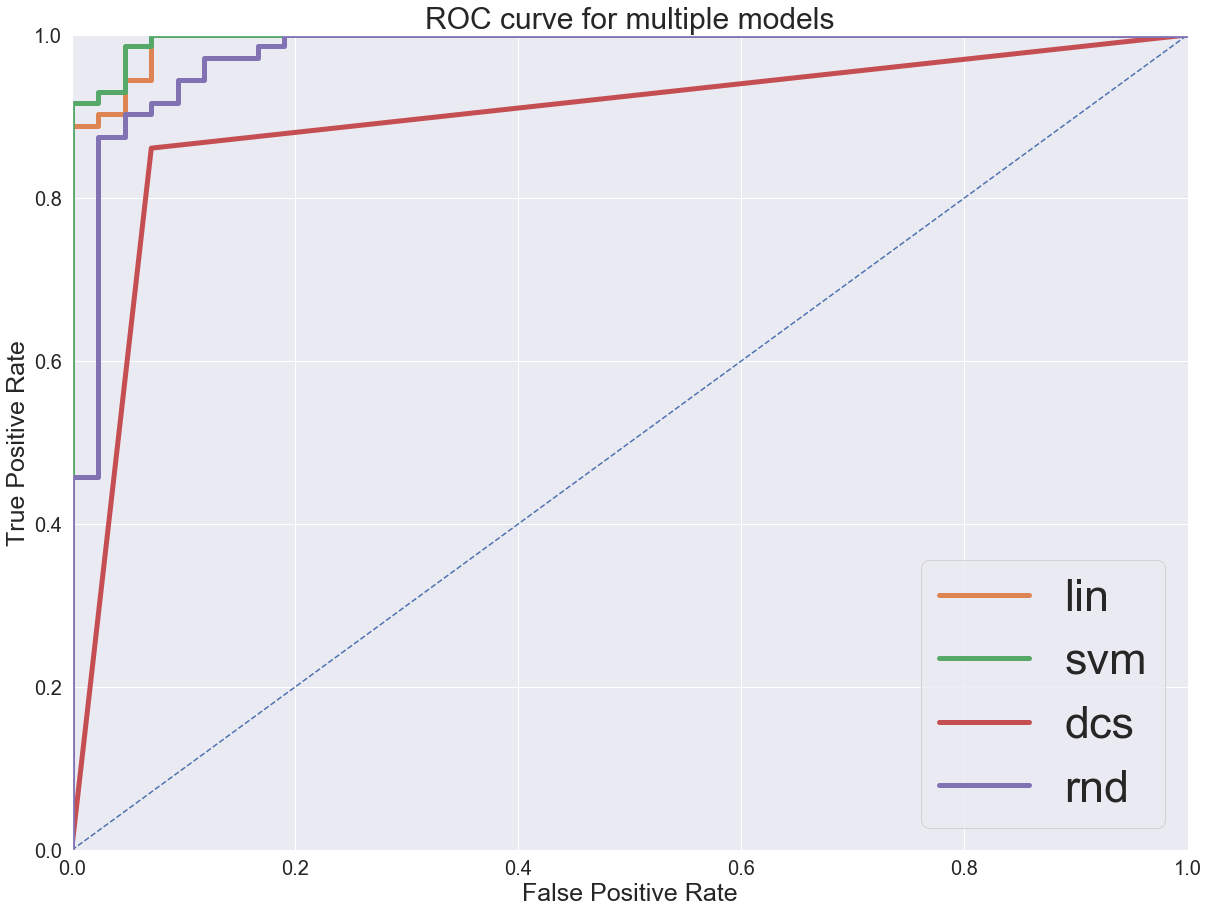

In [295]:
# 테스트 세트에서 ROC 곡선 그래프 출력
fpr_lin, tpr_l, thresholds = roc_curve(y_test,
                                       y_pred_opt_lin_reg_prob[: , 1],
                                       pos_label= 1)

fpr_svm, tpr_s, thresholds = roc_curve(y_test,
                                       y_pred_opt_svm_prob[: , 1],
                                       pos_label= 1)

fpr_dcs, tpr_d, thresholds = roc_curve(y_test,
                                       y_pred_opt_decs_clf_prob[: , 1],
                                       pos_label= 1)

fpr_rnd, tpr_r, thresholds = roc_curve(y_test,
                                       y_pred_opt_rnd_clf_prob[: , 1],
                                       pos_label= 1)


fig = plt.figure(figsize=(20, 15))


ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], ls="--")


ax.set_xlabel('False Positive Rate', fontsize=25)
ax.set_ylabel('True Positive Rate', fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_title('ROC curve for multiple models', fontsize=30)

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

ax.plot(fpr_lin, tpr_l, label = "lin", linewidth=5)
ax.plot(fpr_svm, tpr_s, label = "svm", linewidth=5)
ax.plot(fpr_dcs, tpr_d, label = "dcs", linewidth=5)
ax.plot(fpr_rnd, tpr_r, label = "rnd", linewidth=5)

ax.legend(loc="lower right", fontsize=45)

plt.show()

ROC 커브에서 양성을 양성이라 판단할 확률이 높으며, 음성을 음성으로 판단할 확률이 높다면 그 모델의 ROC 커브는 좌측 상단에 수렴하는 형태가 된다.

In [297]:
# AUC값이 ROC 커브의 아래 면적의 값
from sklearn.metrics import auc
               
print("로지스틱 회귀 AUC: {:.3f}".format(auc(fpr_lin,tpr_l)))
print("서포트벡터머신 AUC: {:.3f}".format(auc(fpr_svm,tpr_s)))
print("의사결정나무 AUC: {:.3f}".format(auc(fpr_dcs,tpr_d)))
print("랜덤포레스트 AUC: {:.3f}".format(auc(fpr_rnd,tpr_r)))

로지스틱 회귀 AUC: 0.994
서포트벡터머신 AUC: 0.996
의사결정나무 AUC: 0.895
랜덤포레스트 AUC: 0.977
